https://musicinformationretrieval.com/basic_feature_extraction.html

In [5]:
import numpy as np 
import librosa 
import matplotlib.pyplot as plt 
import pandas as pd 
import glob 
import os 
from IPython.display import Audio
import librosa.display
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale 
import seaborn as sns
#plt.style.use('ggplot')

### Autocorrelation 

In [17]:
base_path = './res/split'
files = sorted(glob.glob(os.path.join(base_path, '*.wav')))
print('Found {} files'.format(len(files)))

Found 37 files


In [22]:
[]

./res/split/a_dodo.wav ./res/split/y_louis.wav


### Spectral features 

In [6]:
base_path = './res/split'
files = sorted(glob.glob(os.path.join(base_path, '*.wav')))
print('Found {} files'.format(len(files)))

Found 37 files


In [7]:
df = pd.DataFrame(data= [os.path.basename(f) for f in files], columns = ['path'])
df['label'] = df.path.apply(lambda x : x.split('/')[-1][0])
df['speaker'] = df.path.apply(lambda x : x.split('_')[1].split('.')[0])
print(df.head())

             path label   speaker
0      a_dodo.wav     a      dodo
1   a_florian.wav     a   florian
2      a_hugo.wav     a      hugo
3        a_jo.wav     a        jo
4  a_jonathan.wav     a  jonathan


In [14]:
def extract_feature(x, 
                    f_type = 'centroid', 
                    c_type = 'mean'): 
    audio, sr = librosa.load(os.path.join(base_path, x))
    if f_type == 'centroid': 
        data = librosa.feature.spectral_centroid(audio, sr = sr)[0]
    elif f_type == "bandwidth": 
        data = librosa.feature.spectral_bandwidth(audio, sr = sr, p = 2)[0]
    elif f_type == "rolloff": 
        data = librosa.feature.spectral_rolloff(audio, sr = sr)[0]
    
    if c_type == "mean":
        return np.mean(data)
    elif c_type == "first": 
        return data[0]

df['centroid'] = df.path.apply(lambda x : extract_feature(x))
df['bw'] = df.path.apply(lambda x : extract_feature(x, f_type = "bandwidth"))
df['ro'] = df.path.apply(lambda x : extract_feature(x, f_type = "rolloff"))

/home/mehdi/miniconda3/envs/MLAgents/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1992
  warnings.warn(
/home/mehdi/miniconda3/envs/MLAgents/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1480
  warnings.warn(
/home/mehdi/miniconda3/envs/MLAgents/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1736
  warnings.warn(


In [15]:
df.head()

,path,label,speaker,centroid,bw,ro
0,a_dodo.wav,a,dodo,1328.078123,2022.014337,1512.990851
1,a_florian.wav,a,florian,1229.726965,1478.397751,1736.114502
2,a_hugo.wav,a,hugo,1307.984876,1699.499760,2141.015625
3,a_jo.wav,a,jo,2589.802674,2317.343859,5431.336388
4,a_jonathan.wav,a,jonathan,2417.042692,2011.252789,4801.904297


<AxesSubplot:xlabel='ro', ylabel='bw'>

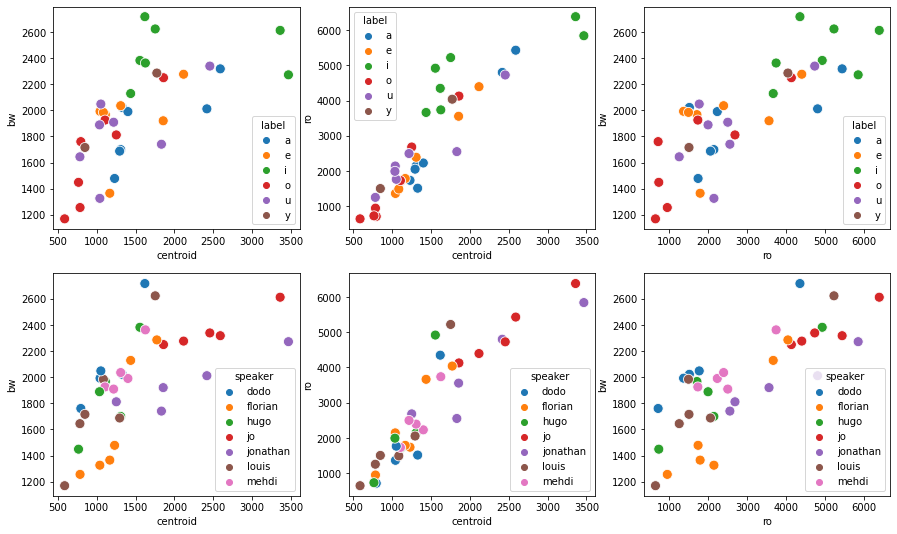

In [16]:
f, axes = plt.subplots(2,3, figsize = (15,9))
axes =axes.flatten()
sns.scatterplot(data = df, x = 'centroid', y = 'bw', hue = 'label', ax = axes[0], s = 100)
sns.scatterplot(data = df, x = 'centroid', y = 'ro', hue = 'label', ax = axes[1], s = 100)
sns.scatterplot(data = df, x = 'ro', y = 'bw', hue = 'label', ax = axes[2], s = 100)

sns.scatterplot(data = df, x = 'centroid', y = 'bw', hue = 'speaker', ax = axes[3], s = 100)
sns.scatterplot(data = df, x = 'centroid', y = 'ro', hue = 'speaker', ax = axes[4], s = 100)
sns.scatterplot(data = df, x = 'ro', y = 'bw', hue = 'speaker', ax = axes[5], s = 100)

In [3]:
files = sorted(glob.glob('./res/aeiou/*.wav'))
print('Found {} files'.format(len(files)))
print(files)

Found 6 files
['./res/aeiou/Dodo.wav', './res/aeiou/Hugo.wav', './res/aeiou/Louis.wav', './res/aeiou/aeiou_florian.wav', './res/aeiou/aeiou_jonathan.wav', './res/aeiou/aeiou_mehdi.wav']


Text(0.5, 1.0, 'RO')

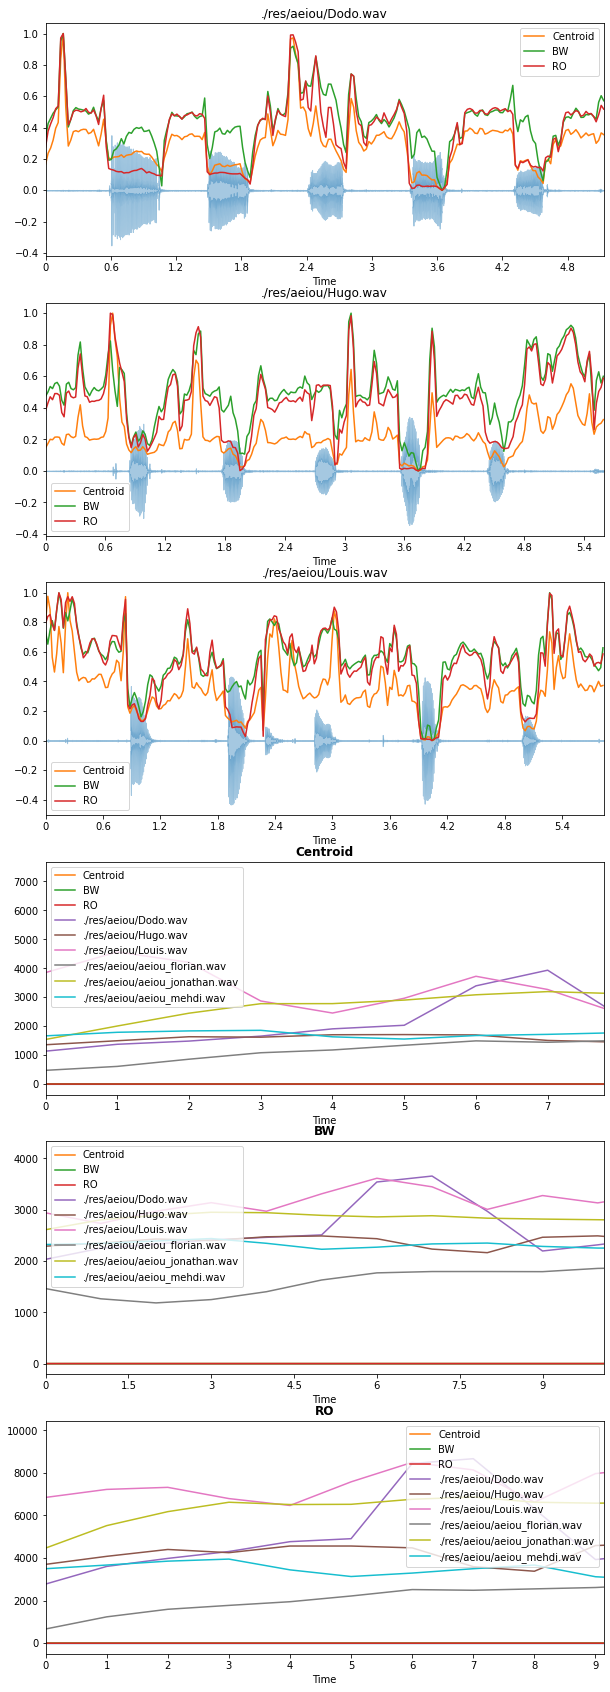

In [4]:
f, axes = plt.subplots(6,1, figsize = (10,30))
axes = axes.flatten()
scs, bws, ros = [], [], []
for i, f in enumerate(files): 
    
    audio, sr = librosa.load(f)
    audio,_ = librosa.effects.trim(audio)
    audio += 0.001
    spectral_centroid = librosa.feature.spectral_centroid(audio, sr = sr)[0]
    bandwidth = librosa.feature.spectral_bandwidth(audio, sr = sr, p = 2)[0]
    rolloff = librosa.feature.spectral_rolloff(audio, sr = sr)[0]
    
    scs.append(spectral_centroid.flatten())
    bws.append(bandwidth.flatten())
    ros.append(rolloff.flatten())
    
    librosa.display.waveplot(audio, ax = axes[i], alpha = 0.4)
    #axes[i].scatter(np.linspace(0, len(audio)/sr, len(audio)), audio)
    t = librosa.frames_to_time(range(len(spectral_centroid.flatten())))
    axes[i].plot(t, minmax_scale(spectral_centroid.reshape(-1,1)), label = 'Centroid')
    axes[i].plot(t, minmax_scale(bandwidth.reshape(-1,1)), label = 'BW')
    axes[i].plot(t, minmax_scale(rolloff.reshape(-1,1)), label = 'RO')
    axes[i].legend()
    
    axes[i].set_title(f)
    if i == 0: 
        Audio(f)
for sc,bw,ro,f in zip(scs, bws, ros, files): 
    axes[3].plot(sc, label = f)
    axes[4].plot(bw, label = f)
    axes[5].plot(ro, label = f)
axes[3].legend()
axes[4].legend()
axes[5].legend()
axes[3].set_title('Centroid', weight=  'bold')
axes[4].set_title('BW', weight=  'bold')
axes[5].set_title('RO', weight=  'bold')

### L'extrait de Jonathan est le moins bruité 

In [ ]:
selected_file = files[1]


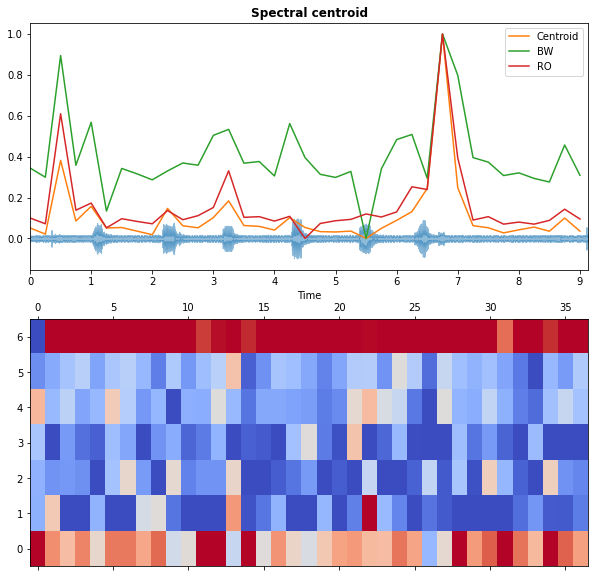

In [23]:
f, axes = plt.subplots(2,1, figsize = (10,10))
axes = axes.flatten()
audio += 0.001
hop_length = int(sr/4)

spectral_centroid = librosa.feature.spectral_centroid(audio, sr = sr, hop_length = hop_length)
bandwidth = librosa.feature.spectral_bandwidth(audio, sr = sr, p = 2, hop_length = hop_length)
rolloff = librosa.feature.spectral_rolloff(audio, sr = sr, hop_length = hop_length)
librosa.display.waveplot(audio, sr =sr, alpha = 0.5, ax = axes[0])
t = librosa.frames_to_time(range(len(spectral_centroid.flatten())), hop_length =hop_length)


axes[0].plot(t, minmax_scale(spectral_centroid.reshape(-1,1)), label = 'Centroid')
axes[0].plot(t, minmax_scale(bandwidth.reshape(-1,1)), label = 'BW')
axes[0].plot(t, minmax_scale(rolloff.reshape(-1,1)), label = 'RO')
axes[0].set_title('Spectral centroid', weight = 'bold')
axes[0].legend()
spectral_contrast = librosa.feature.spectral_contrast(audio, sr = sr, hop_length = hop_length)
axes[1].matshow(minmax_scale(spectral_contrast), cmap = 'coolwarm', 
                aspect = 'auto', origin = 'lower')

Text(0.5, 1.0, 'Spectral centroid')

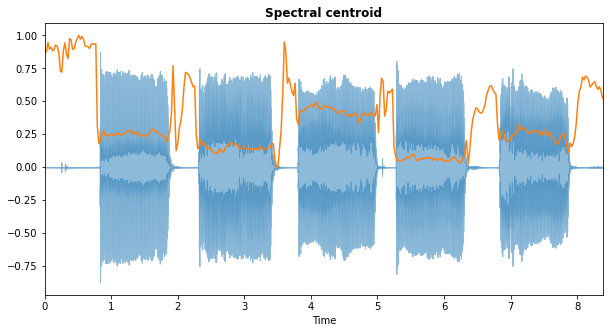

In [45]:
audio, sr = librosa.load('./res/dorian/aeiou-dorian.wav')
audio,_ = librosa.effects.trim(audio)

plt.figure(figsize = (10,5))
spectral_centroid_d = librosa.feature.spectral_centroid(audio, sr = sr)
librosa.display.waveplot(audio, sr =sr, alpha = 0.5)
plt.plot(librosa.frames_to_time(range(len(spectral_centroid_d.flatten()))), minmax_scale(spectral_centroid_d.reshape(-1,1)))
plt.title('Spectral centroid', weight = 'bold')

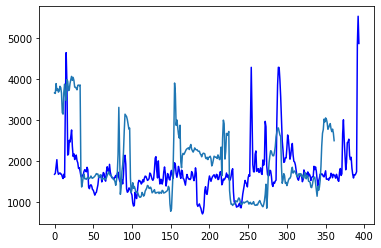

In [46]:
plt.plot(spectral_centroid.flatten(), color = 'blue', label = 'Mehdi')
plt.plot(spectral_centroid_d.flatten(), label = 'Dorian')

In [2]:
files = glob.glob('./*.mp3')
audio, sr = librosa.load(files[0])

/home/mehdi/miniconda3/envs/MLAgents/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [3]:
Audio(files[0])

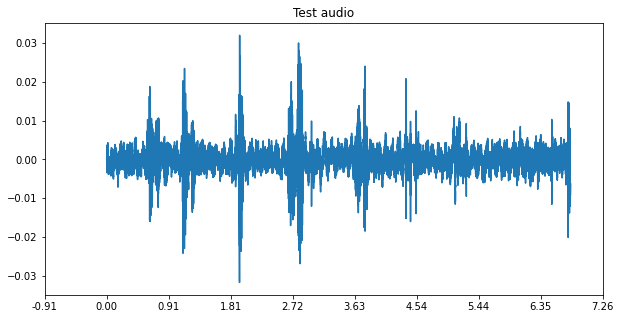

In [4]:
plt.figure(figsize = (10,5))
_ = plt.plot(audio)
plt.title('Test audio')
locs, labels = plt.xticks()
labels = ['{:.2f}'.format(loc / sr) for loc in locs]
xlabels = np.linspace(0, len(audio)/sr, len(labels))
xlabels= ['{:.1f}'.format(xx) for xx in xlabels]
_ = plt.xticks(locs, labels)

In [5]:
s = 0 
e = 22500
audio[s:e]

array([ 1.4075058e-05,  7.5617660e-05, -8.1386148e-05, ...,
       -1.9183508e-03, -1.8205363e-03, -2.2113894e-03], dtype=float32)

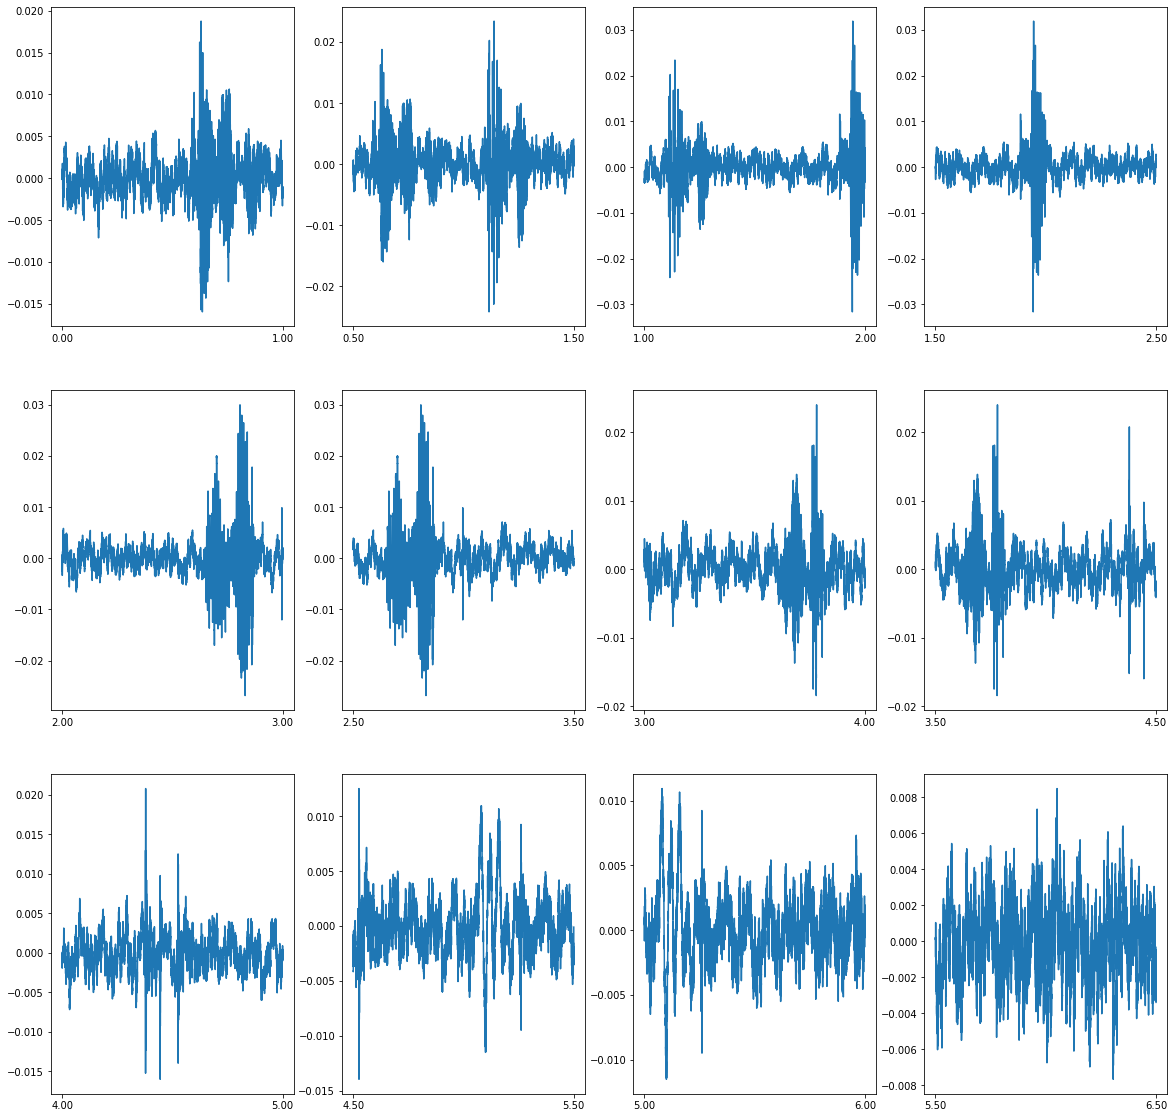

In [6]:
win_size = 1. # seconds 
overlay = 0.5 #

end_samples = win_size * sr
nb_windows = int(len(audio)/((win_size - overlay)*sr)) 
f, axes = plt.subplots(3,4, figsize = (20,20))
axes = axes.flatten()
ax_counter = 0
while end_samples < len(audio)-1: 
    start_sample = end_samples- (sr * win_size)
    
    win = audio[int(start_sample):int(end_samples)]
    axes[ax_counter].plot(win)
    axes[ax_counter].set_xticks([0, sr])
    axes[ax_counter].set_xticklabels(['{:.2f}'.format(start_sample/ sr),
                                       '{:.2f}'.format(end_samples/ sr)])
    # process 
    end_samples = min([int(end_samples + (win_size - overlay) * sr), audio.shape[0]])
    ax_counter += 1

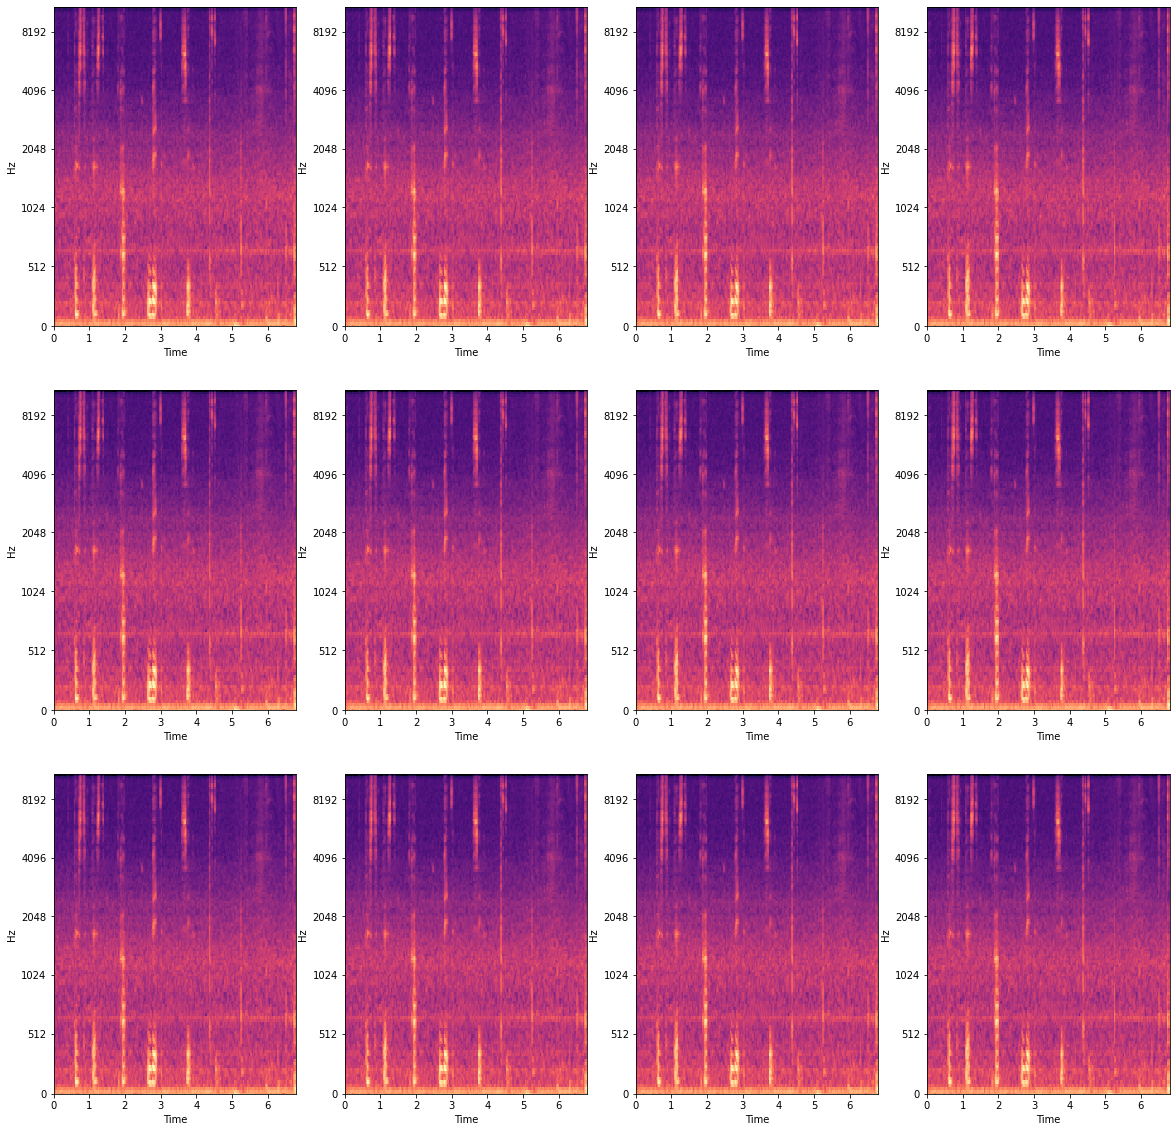

In [7]:
win_size = 1. # seconds 
overlay = 0.5 #

end_samples = win_size * sr
nb_windows = int(len(audio)/((win_size - overlay)*sr)) 
f, axes = plt.subplots(3,4, figsize = (20,20))
axes = axes.flatten()
ax_counter = 0
while end_samples < len(audio)-1: 
    start_sample = end_samples- (sr * win_size)
    
    win = audio[int(start_sample):int(end_samples)]
    
    #D = librosa.stft(win)
    #S_db = librosa.amplitude_to_db(np.abs(D))
    M = librosa.power_to_db(librosa.feature.melspectrogram(audio, sr = sr), ref =np.max)
    librosa.display.specshow(M, x_axis='time', y_axis='mel', ax=axes[ax_counter])
     #librosa.display.specshow(S_db, ax = axes[ax_counter])
    #axes[ax_counter].plot(win)
    #axes[ax_counter].set_xticks([0, sr])
    #axes[ax_counter].set_xticklabels(['{:.2f}'.format(start_sample/ sr),
    #                                   '{:.2f}'.format(end_samples/ sr)])
    # process 
    end_samples = min([int(end_samples + (win_size - overlay) * sr), audio.shape[0]])
    ax_counter += 1

### Are there correlations between utterances ? 

5


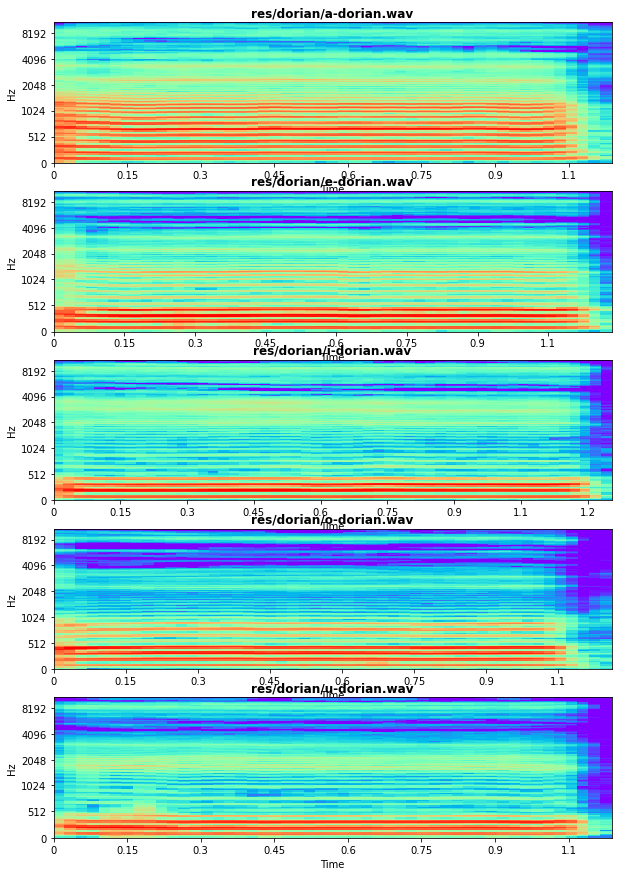

In [18]:
files = sorted(glob.glob('res/dorian/*.wav'))
files = [f for f in files if not 'aei' in f]
files = [f for f in files if not '1' in f]
print(len(files))
               
f, axes = plt.subplots(len(files), 1, figsize = (10, 3*len(files)))
axes = axes.flatten()
for i,ax in enumerate(axes): 
    y, sr = librosa.load(files[i])
    M = librosa.power_to_db(librosa.feature.melspectrogram(y, sr = sr), ref =np.max)
    librosa.display.specshow(M, x_axis='time', y_axis='mel', ax=ax, cmap = 'rainbow')
    ax.set_title(files[i], weight = 'bold')

In [9]:
files = sorted(glob.glob('res/dorian/*.wav') + glob.glob('res/enzo/*.wav'))
files = [f for f in files if not 'aei' in f]
files = [f for f in files if not '1' in f]
print(len(files))

10


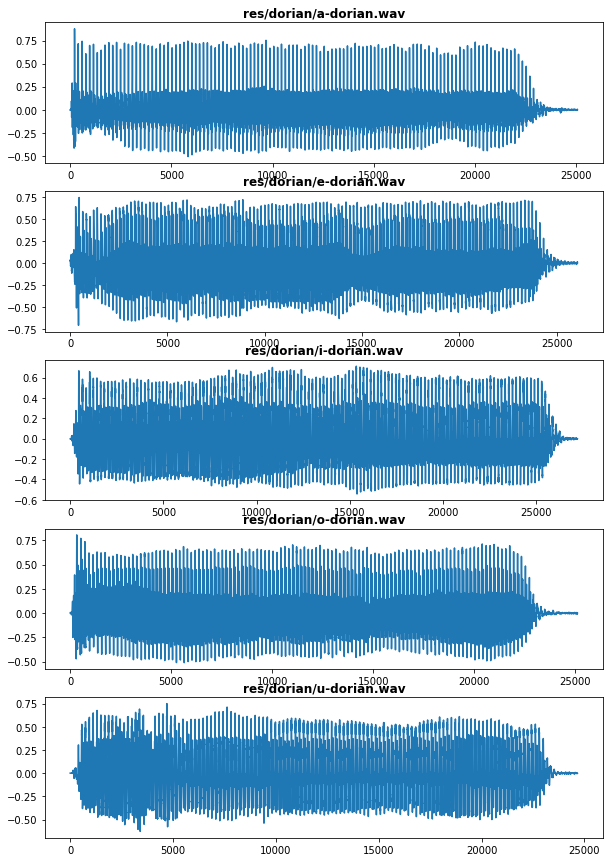

In [17]:
f, axes = plt.subplots(len(files), 1, figsize = (10, 3*len(files)))
axes = axes.flatten()
for i,ax in enumerate(axes): 
    y, sr = librosa.load(files[i])
    ax.plot(y)
    ax.set_title(files[i], weight = 'bold')
    

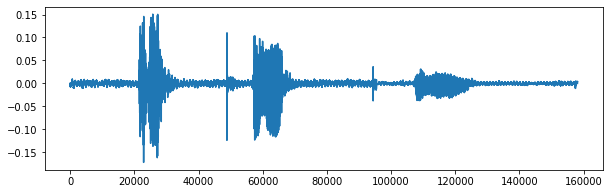

In [12]:
f = plt.figure(figsize = (10,3))
y, sr = librosa.load('./res/mehdi/a_mehdi.wav')
plt.plot(y)

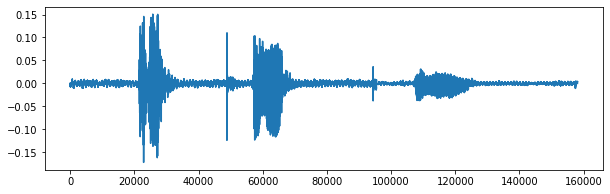

In [13]:
f = plt.figure(figsize = (10,3))
y, sr = librosa.load('./res/mehdi/a_mehdi_2.wav')
plt.plot(y)

/home/mehdi/miniconda3/envs/MLAgents/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


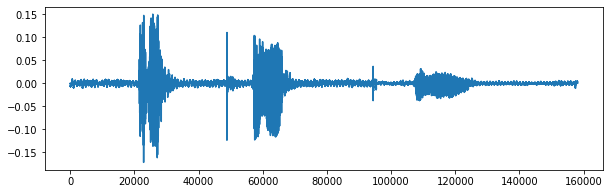

In [14]:
f = plt.figure(figsize = (10,3))
y, sr = librosa.load('./res/mehdi/a_mehdi.mp3')
plt.plot(y)

In [27]:
files = glob.glob('res/enzo/*.wav') + glob.glob('res/dorian/*.wav')
files = [f for f in files if not 'aei' in f]
audios = [(librosa.load(f)[0]).reshape(1,-1) for f in files]
max_shape = np.max([a.shape[1] for a in audios])
audios_np = np.zeros((len(audios), max_shape))
for i,audio in enumerate(audios): 
    audios_np[i,:audios[i].shape[-1]] = audios[i]


In [46]:
pca = PCA(n_components = 0.999)
out = pca.fit_transform(audios_np)
print(out.shape)

(20, 14)


<AxesSubplot:>

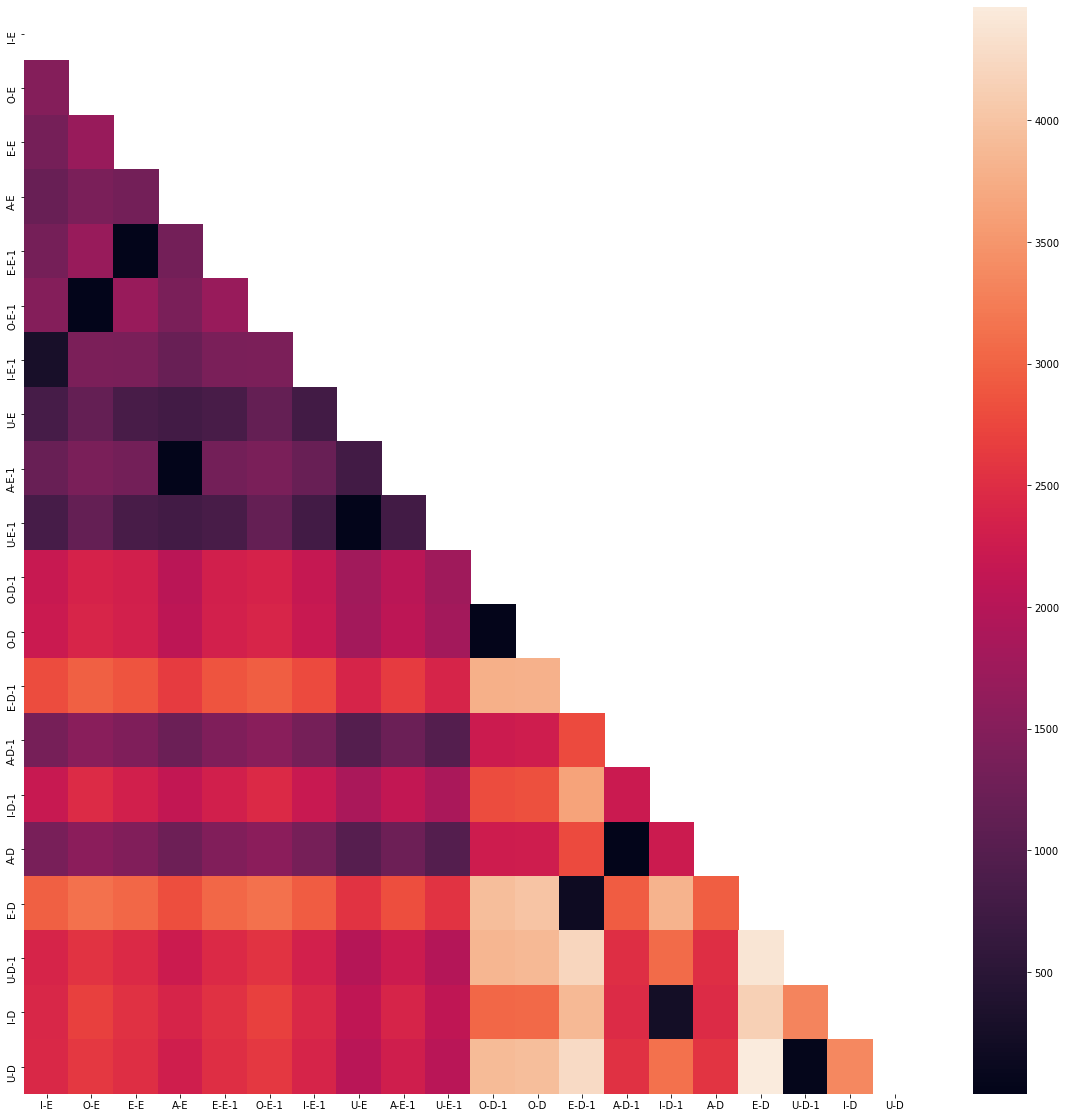

In [49]:
dists = np.zeros((out.shape[0], out.shape[0]))
for i in range(dists.shape[0]): 
    for j in range(dists.shape[0]):
        d = ((out[j].flatten() - out[i].flatten())**2).sum()
        dists[i,j] = d
f, ax = plt.subplots(1,1, figsize =(20,20))
labels = [f.split('/')[-1].replace('enzo','E').replace('dorian','D').replace('.wav', '').upper() for f in files]

mask = np.zeros_like(dists)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dists, ax =ax, xticklabels = labels, yticklabels = labels, mask = mask)